<a href="https://colab.research.google.com/github/IamHassanAb/Machine-Learning/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression
**Linear Regression** is a Supervised Learning Algorithm that is used to find the relationship between one or more independent variables and a dependent variable. By finding the optimal regression line based on our data.

\begin{equation} h_o(x) = \theta_0 + \theta_1x + \epsilon \end{equation}

\begin{equation} h_o(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + … + \theta_nx_n + \epsilon \end{equation}

θ = the parameter(s) (also called weights or regression Coefficients)

hθ(x) = hypothesis function it can also be considered as the expected value of y given x and θ.

y = original value  

x = independent variable(s)

n = the number of input variables

The above equation becomes

\begin{equation} h_\theta(x) = \sum_{i=0}^n \theta_i x_i = \theta^T x \end{equation}

We define the cost function as:

\begin{equation} J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y{(i)})2 \end{equation}

We want to choose θ so as to minimize J(θ). So, we consider the gradient descent algorithm to find the optimal θ value to minimize J(θ)

\begin{equation} \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \end{equation}

We found the derivative of J(θ) to be:

\begin{equation} \frac{\partial}{\partial \theta_j} J(\theta) = (h_\theta(x) - y) x_j \end{equation}

Putting it in the gradient descent formula, we get:

\begin{equation} \theta_j = \theta_j - \alpha (h_\theta(x) - y) x_j \end{equation}

or

\begin{equation} \theta_j = \theta_j + \alpha (y - h_\theta(x)) x_j \end{equation}

#### **Batch Gradient Descent:**


*Repeat until convergence*
{  
\begin{equation} \theta_j = \theta_j + \alpha\sum_{i=0}^m (y^i - h_\theta(x^i)) x_j^i \ (for\ every\ j)\end{equation}
}

This is called the Batch Gradient Descent. There’s another type of Gradient Descent Algorithm called Stochastic Gradient Descent.

#### **Stochastic Gradient Descent:**
*Repeat until convergence*
{

  for i to m {

  \begin{equation} \theta_j = \theta_j + \alpha\ (y^i - h_\theta(x^i)) x_j^i \ (for\ every\ j)\end{equation}

}

}

**Note:** learning rate should be neither be too large nor too small because if too small the algorithm will be computationally expensive or too large we might miss the converging point.

#### **Normal Equations *(Exclusive to Linear Regression)*:**
Gradient descent gives one way of minimizing J. Normal Equations are another ways of finding the optimal J without the iterative appreoach

\begin{equation} \theta = (X^TX)^{-1}X^T\vec y \end{equation}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import sklearn.metrics as metrics
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

##### Data (Fish)

In [ ]:
def get_full_sample_matrix(samples):
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)

    ones_vec = np.ones((samples_matrix.shape[0], 1), dtype=samples.dtype)
    return np.hstack([ones_vec, samples_matrix])

def grad_desc(Xs, Ys, rate = 0.001, iterations = 100):
    Ws = np.zeros((Xs.shape[1], 1))
    for _ in range(iterations):
        errors = Ys - Xs.dot(Ws)
        grad = -(Xs.T).dot(errors)
        Ws = Ws - (grad)*rate
    return Ws

In [ ]:
fish_data = pd.read_csv('/content/Fish_dataset.csv')
df_fish_shuffled = fish_data.sample(n=len(fish_data), random_state=2)
df_fish_shuffled.head()
len(fish_data)

159

In [ ]:
#Scaling
# scaler =  QuantileTransformer(output_distribution='normal')
scaler =  StandardScaler()
df_fish_shuffled = df_fish_shuffled[df_fish_shuffled["Species"] == "Bream"][['Length1','Length2',	'Length3',	'Height',	'Width' ,'Weight']]
df_fish_shuffled.iloc[:, :5] = scaler.fit_transform(df_fish_shuffled.iloc[:, :5])
data = get_full_sample_matrix(df_fish_shuffled.values)
print(f"Description of Xs:\n{pd.DataFrame(data).describe()}\n\n")

Description of Xs:
          0             1             2             3             4  \
count  35.0  3.500000e+01  3.500000e+01  3.500000e+01  3.500000e+01   
mean    1.0 -2.623298e-15 -4.948423e-16 -2.474211e-16 -1.083260e-15   
std     0.0  1.014599e+00  1.014599e+00  1.014599e+00  1.014599e+00   
min     1.0 -2.006137e+00 -1.999300e+00 -2.038607e+00 -1.891729e+00   
25%     1.0 -6.509661e-01 -7.154648e-01 -6.598978e-01 -6.322498e-01   
50%     1.0  2.661943e-02 -2.815915e-02  3.555709e-02 -1.181611e-01   
75%     1.0  4.642267e-01  4.905621e-01  5.846004e-01  6.081732e-01   
max     1.0  2.172307e+00  2.046726e+00  1.987711e+00  1.948832e+00   

                  5            6  
count  3.500000e+01    35.000000  
mean  -6.486875e-16   617.828571  
std    1.014599e+00   209.205709  
min   -1.979414e+00   242.000000  
25%   -6.809115e-01   462.500000  
50%   -2.074374e-01   610.000000  
75%    9.055851e-01   717.000000  
max    1.859142e+00  1000.000000  




In [ ]:
#Train Test Validation Split
train, valid, test = data[:25], data[25:30], data[30:35]
X_train, y_train = train[:,:6], train[:,-1]
X_valid, y_valid = valid[:,:6], valid[:,-1]
X_test, y_test = test[:,:6], test[:,-1]
train.shape, valid.shape, test.shape

((25, 7), (5, 7), (5, 7))

##### Data (California Housing)

In [ ]:
def get_full_sample_matrix(samples):
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)

    ones_vec = np.ones((samples_matrix.shape[0], 1), dtype=samples.dtype)
    return np.hstack([ones_vec, samples_matrix])

def grad_desc(Xs, Ys, rate = 0.001, iterations = 100):
    Ws = np.zeros((Xs.shape[1], 1))
    for _ in range(iterations):
        errors = Ys - Xs.dot(Ws)
        grad = -(Xs.T).dot(errors)
        Ws = Ws - (grad)*rate
    return Ws

In [ ]:
housing = fetch_california_housing(as_frame=True)
df_house = housing.frame
df_house.rename(columns={"MedHouseVal": "MedHouseVal($100K)",},
inplace = True)
df_house.drop(labels=['Latitude','Longitude'],axis=1, inplace=True)
df_house_shuffled = df_house.sample(n=len(df_house), random_state=2)

In [ ]:
#Adding Bias
# df_house_shuffled.insert(0, 'Bias', np.random.randn(df_house_shuffled.shape[0])) # Dont Need that
df_house_shuffled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal($100K)
10385,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,2.787
1943,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,2.076
7490,1.7411,35.0,5.369159,1.294393,909.0,4.247664,0.967
16889,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,3.538
11416,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,3.905


In [ ]:
#Scaling
# scaler =  QuantileTransformer(output_distribution='normal')
scaler =  StandardScaler()
df_house_shuffled.iloc[:, :6] = scaler.fit_transform(df_house_shuffled.iloc[:, :6])
data = get_full_sample_matrix(df_house_shuffled.values)
print(f"Description of Xs:\n{pd.DataFrame(data).describe()}\n\n")

Description of Xs:
             0             1             2             3             4  \
count  20640.0  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean       1.0  5.645785e-17  3.821233e-17  7.642465e-17  3.690416e-16   
std        0.0  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min        1.0 -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00   
25%        1.0 -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01   
50%        1.0 -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01   
75%        1.0  4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03   
max        1.0  5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01   

                  5             6             7  
count  2.064000e+04  2.064000e+04  20640.000000  
mean  -9.639146e-18  2.754042e-18      2.068558  
std    1.000024e+00  1.000024e+00      1.153956  
min   -1.256123e+00 -2.290000e-01      0.149990  
25%   -5.638089e-01 -6.171062e-02      1.196000  
50%   -2.29131

In [ ]:
#Train Test Validation Split
train, valid, test = data[:18000], data[18000:19320], data[19320:20640]
X_train, y_train = train[:,:7], train[:,-1]
X_valid, y_valid = valid[:,:7], valid[:,-1]
X_test, y_test = test[:,:7], test[:,-1]
X_train.shape, y_train.shape

((18000, 7), (18000,))

#### Linear Regression

In [ ]:
class LinearModel(object):
    """Base class for linear models."""

    def __init__(self, step_size=0.001, max_iter=1000, eps=0.31, theta_0=None, verbose=True, method='norm', plot=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
            method: The method of optimization. ('norm'/'gdb'/'gds')
            plot: Plot the Optimization path (True/False)
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose
        self.method = method
        self.plot = plot

    def fit(self, x, y):
        """Run solver to fit linear model.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        raise NotImplementedError('Subclass of LinearModel must implement fit method.')

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        raise NotImplementedError('Subclass of LinearModel must implement predict method.')

##### Model

In [ ]:
class LinearRegression(LinearModel):
    """Linear regression with Gradient Descent."""
    J_arr = []
    e_arr = []

    def fit(self, x, y):
        """Run Gradient Descent Method to minimize J(theta) for Linear Regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n)

        # J_arr = []  # To store cost values for plotting
        # e_arr = []  # To store MSE values for plotting
        J = 0
        error = 0

        if self.method == 'norm':
            self.theta = np.linalg.inv(x.T @ x) @ (x.T @ y)
            J = np.mean((y - x @ self.theta) ** 2) / 2.0
            error = np.mean((x @ self.theta - y) ** 2)

            if self.verbose:
                print(f"J: {J}, squared error = {np.mean((y - x @ self.theta) ** 2)}, theta = {self.theta} ")

        if self.method == 'gdb':
            decay_factor = 0.5  # Adjust this as needed (if needed)
            decay_interval = 10  # Adjust this as needed (if needed)

            for i in range(self.max_iter):
                error = y - x @ self.theta
                J = np.mean((y - x @ self.theta) ** 2) / (2.0)
                self.J_arr.append(J)
                self.e_arr.append(np.mean(error ** 2))

                gradient = -x.T @ error / m
                self.theta -= self.step_size * gradient

                # if i % decay_interval == 0:
                #     self.step_size *= decay_factor

                if self.verbose and i % decay_interval == 0:
                    print(f"J: {J}, squared error = {np.mean(error ** 2)}, theta = {self.theta} ")

                if J < self.eps and self.verbose:
                    print("Converged With Parameters:")
                    print(f"J: {J}, squared error = {np.mean(error ** 2)}, theta = {self.theta} ")
                    break

        if self.method == 'gds':
            decay_factor = 0.5  # Adjust this as needed
            decay_interval = 10  # Adjust this as needed
            flag = False

            for _ in range(self.max_iter):

              for i in range(m):
                idx = np.random.randint(0, m)
                xi = x[idx:idx+1]
                yi = y[idx:idx+1]
                error = yi - xi @ self.theta
                J = np.mean((yi - xi @ self.theta) ** 2) / (2.0)
                self.J_arr.append(J)
                self.e_arr.append(np.mean(error ** 2))

                gradient = - (error @ xi) / m
                self.theta -= self.step_size * gradient

                # if i % decay_interval == 0:
                #     self.step_size *= decay_factor

                if self.verbose and i % decay_interval == 0:
                  print(f"J: {J}, squared error = {np.mean(error ** 2)}, theta = {self.theta} ")

                if J < self.eps:
                  flag=True
                  break

              if self.verbose and flag==True:
                  print("Converged With Parameters:")
                  print(f"J: {J}, squared error = {np.mean(error ** 2)}, theta = {self.theta} ")
              break

        if self.plot and self.method != 'norm':
            fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 5))
            axes[0].set_title("J(theta)")
            axes[0].set_xlabel(f"iterations")
            axes[0].set_ylabel('J(theta)')
            axes[0].plot(self.J_arr, color='red')
            axes[1].set_title("mse")
            axes[1].set_xlabel(f"iterations")
            axes[1].set_ylabel('mse')
            axes[1].plot(self.e_arr, color='g')
        elif self.plot and self.method == 'norm':
            print('')
            print('----------------------------------------------------------')
            print('Normal Equation used to find "theta", Graph Not Available.')
        else:
            pass

    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """
        return x @ self.theta


##### Fitting and Validation

In [ ]:
regressor = LinearRegression(method='gdb', verbose=False, plot=False)
regressor.fit(X_train,y_train)

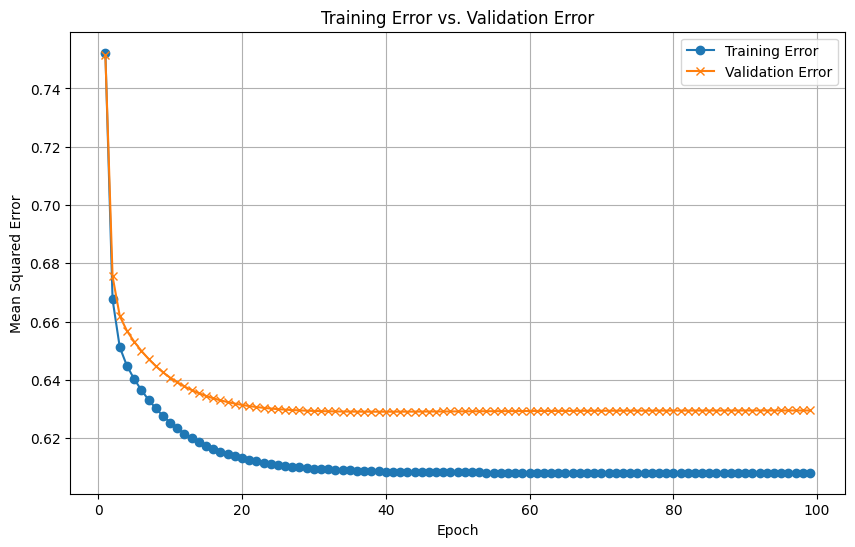

In [ ]:
rng = np.random.default_rng()
train_errors = []
valid_errors = []
for epoch in range(1, 100):  # You can change the range as needed
    # rng.shuffle(train, axis=0)
    # rng.shuffle(valid, axis=0)

    # X_train, y_train = train[:,:7], train[:,-1]
    # X_valid, y_valid = valid[:,:7], valid[:,-1]

    regressor.fit(X_train, y_train)

    # Calculate training error (e.g., mean squared error)
    y_train_pred = regressor.predict(X_train)
    train_error = metrics.mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Calculate test error (e.g., mean squared error)
    y_valid_pred = regressor.predict(X_valid)
    valid_error = metrics.mean_squared_error(y_valid, y_valid_pred)
    valid_errors.append(valid_error)

# Plot training and test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), train_errors, label='Training Error', marker='o')
plt.plot(range(1, 100), valid_errors, label='Validation Error', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Error vs. Validation Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)
print("Results of evaluation metrics:")
print("MAE:",abs(np.mean(y_test-y_pred)))
print("MSE:", np.mean((y_test-y_pred)**2))
print("RMSE:", np.sqrt(np.mean((y_test-y_pred)**2)))
print("R-Squared:", 1-np.mean((y_test-y_pred)**2)/np.mean((y_test-np.mean(y_test))**2))
print("R-Squared:", np.mean((y_test-y_pred)**2)/np.mean((y_test-np.mean(y_test))**2))

Results of evaluation metrics:
MAE: 0.027527308422561292
MSE: 0.6900801675127621
RMSE: 0.8307106400623276
R-Squared: 0.46245512827405855
R-Squared: 0.5375448717259415


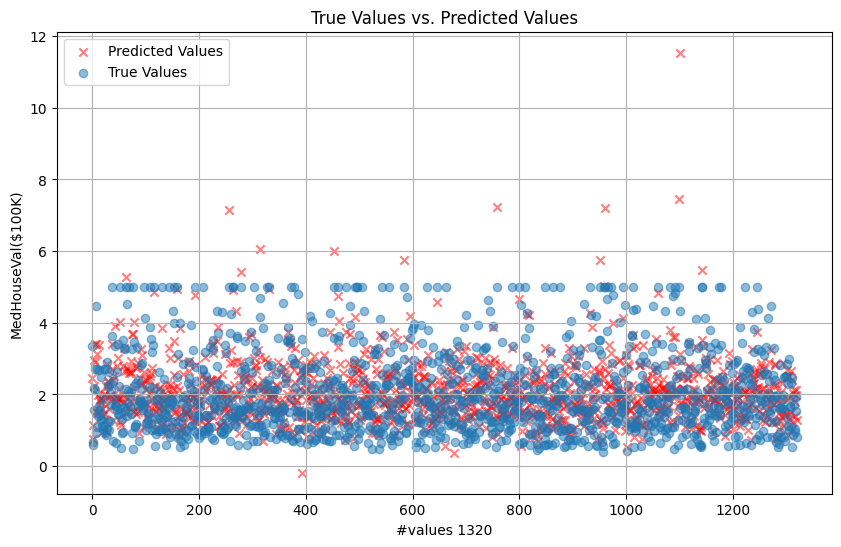

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter([i for i in range(len(y_pred))],y_pred, label='Predicted Values',color='red', alpha=0.5,  marker='x')
plt.scatter([i for i in range(len(y_test))],y_test, label='True Values', alpha=0.5, marker='o')
plt.xlabel('#values 1320')
plt.ylabel('MedHouseVal($100K)')
plt.title('True Values vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
theta = regressor.theta
y = theta[0] + theta[1]*df_house_shuffled['MedInc']
y

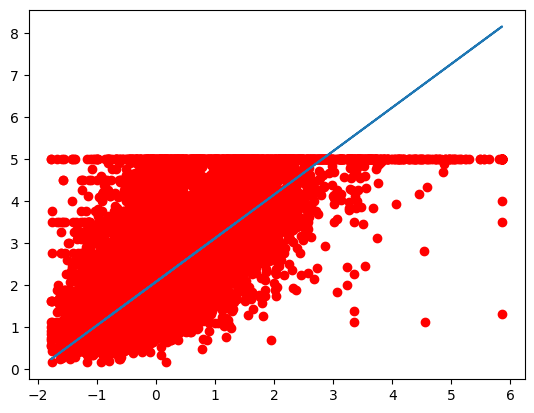

In [ ]:
plt.plot(df_house_shuffled['MedInc'],y)
plt.scatter(df_house_shuffled['MedInc'],df_house_shuffled['MedHouseVal($100K)'], color='red')

In [ ]:
metrics.mean_squared_error(y,df_house_shuffled['MedHouseVal($100K)'])
print("Results of evaluation metrics:")
print("MAE:",abs(np.mean(y-df_house_shuffled['MedHouseVal($100K)'])))
print("MSE:", np.mean((y-df_house_shuffled['MedHouseVal($100K)'])**2))
print("RMSE:", np.sqrt(np.mean((y-df_house_shuffled['MedHouseVal($100K)'])**2)))
print("R-Squared:", 1-np.mean((y-df_house_shuffled['MedHouseVal($100K)'])**2)/np.mean((y-np.mean(y))**2))

Results of evaluation metrics:
MAE: 0.0022633962714436002
MSE: 0.7606012356458772
RMSE: 0.8721245528282513
R-Squared: 0.2938563538350203
